## Stage5 Titanic Data Analysis
dataset: Titanic Data

This dataset contains demographics and passenger information from 891 of the 2,224 passengers and crew on board the Titanic.

###### Missing data:

There are 177 missing data in Age data, 687 missing data in Cabin data and 2 missing data in Embarked data. The data are missing at random. In this analysis, I would simply ignore these missing data by using Pandas built-in functions, such as .describe(), .corr(). The functions will exclude missing data by default.

### Question: What factors made people more likely to survive?
=============
###### Factor1: Class
Passengers in upper class have higher chance to survive. The survival rate of assengers in Upper class(Class1) is 2.5 times higher than the rate of passengers in Lower class(Class3)

###### Factor2: Age
Babies and kids(aged from 0 to 10) have the highest survival rate, 0.59, followed by middle-aged group(aged from 30 to 40) with 0.44 survival rate.

###### Factor3: Gender
Female passengers have higher chance to survive. Female survival rate is 0.74, which is 3.9 times higher than the rate of male passengers. There is huge gender inequality of survival rate accross all age groups, except babies and kids(aged from 0 to 10).

While comparing the male fatalities by age, male in twenties and thirties accounts for the major fatalities in the sinking of Titanic. It might because male takes the major responsibility to rescue or be in charge of the functionality of Titanic and let kids or female to evacuate first.

###### Conclusion
Overall, if you are a kid living in upper class, you might have the best chance to evacuate and survive from Titanic tragedy.

* Limitations


There are total 2,224 passengers and crew on board the Titanic. However, we can only analyze the 891 passengers data out of 2,224, which accounts for only 40% of passenger data. It might cause bias about this survival factor analysis. For improvement, it might be great if we can retrieve the data of total 2,224 passengers.



## Python code

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# Read Titanic data as Pandas dataframe and use .describe() & .head() & .dtypes to get the idea of the data 
file_name = 'titanic_data.csv'
titanic_df = pd.read_csv(file_name)
titanic_df.describe() # .describe() will exclude NaN data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [132]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [133]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [134]:
'''Use Pandas .corr() to calculate the correlation coefficient of Survived with other factors. 
It helps me to get the idea on which factor I can look deeper.'''

titanic_df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [135]:
# Check the number of missing data in each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
# Checking the number of unique PassengerId and number of survivors in this dataset.
# Comparing to total 2,224 passengers and crew on board the Titanic.
print 'Number of unique PassengerId:', len(set(titanic_df.PassengerId))
print 'Number of survivors in this dataset:', titanic_df.Survived.sum()

Number of unique PassengerId: 891
Number of survivors in this dataset: 342


In [137]:
# Function to calculate survival rate by given group name
def survival_rate_calculator(df, group_name):
    total_number_by_group = df.groupby(group_name)['PassengerId'].count()
    survived_number_by_group = df.groupby(group_name)['Survived'].sum()
    return survived_number_by_group / total_number_by_group

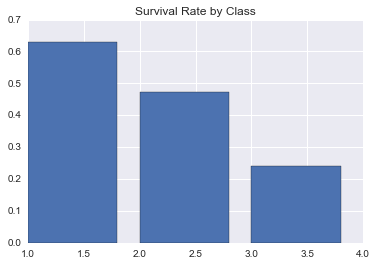

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64
Survival Rate(Class1 vs. Class3): 2.59788359788


In [138]:
# Look into survival rate by class
%matplotlib inline
survival_rate_by_class = survival_rate_calculator(titanic_df, 'Pclass')

plt.bar(survived_rate_by_class.index, survived_rate_by_class)
plt.title('Survival Rate by Class')
plt.show()

print survived_rate_by_class
print 'Survival Rate(Class1 vs. Class3):', survived_rate_by_class.loc[1]/survived_rate_by_class.loc[3]

People stay in Lower Class(class3) are the majority of those who did not survive(Historgram title with "0")


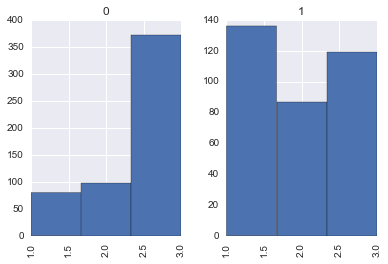

In [139]:
# Compare those who survived and those who didn't survive by class
%matplotlib inline
titanic_df['Pclass'].hist(by= titanic_df['Survived'], bins=3)
print 'People stay in Lower Class(class3) are the majority of those who did not survive(Historgram title with "0")'

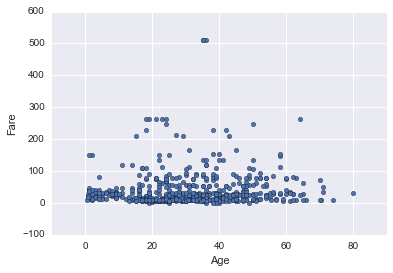

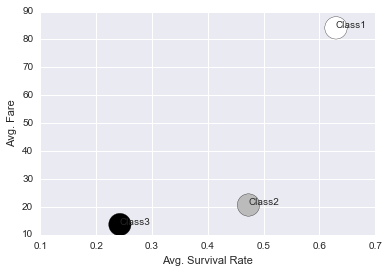

        Avg. Survival Rate  Avg. Fare
Class1            0.629630  84.154687
Class2            0.472826  20.662183
Class3            0.242363  13.675550



In [140]:
%matplotlib inline
titanic_df.corr()['Pclass']
titanic_df.plot(kind='scatter', x= 'Age', y='Fare')
plt.show()

aver_fare_by_class = titanic_df.groupby('Pclass')['Fare'].mean()

df_by_class = pd.concat([survived_rate_by_class, aver_fare_by_class], axis=1)
df_by_class.columns = ['Avg. Survival Rate', 'Avg. Fare']
df_by_class.index = ['Class1', 'Class2', 'Class3']
fig, ax = plt.subplots()
df_by_class.plot(kind='scatter', x= 'Avg. Survival Rate', y='Avg. Fare', marker='o', s= (500.5, 500.5, 500.5), ax=ax)
for k, v in df_by_class.iterrows():
    ax.annotate(k, v)
plt.show()
print df_by_class
print ''

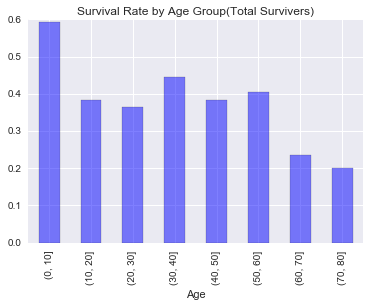

Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
dtype: float64


In [141]:
# Survival rate by age group
bins = np.linspace(0, 80, num=9, dtype ='int16')
age_bin = pd.cut(titanic_df.Age, bins)
survival_rate_by_age = survival_rate_calculator(titanic_df, age_bin)

%matplotlib inline
survival_rate_by_age.plot.bar(alpha=0.5)
plt.title('Survival Rate by Age Group(Total Survivers)')
plt.show()
print survival_rate_by_age


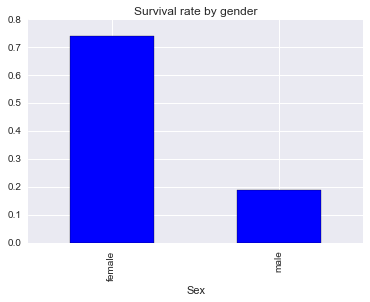

Female survival rate: 0.742038216561
Male survival rate: 0.188908145581
Survival rate(female vs male): 3.92803716473


In [142]:
# Survival rate by gender group
gender_survival_rate = survival_rate_calculator(titanic_df, 'Sex')

%matplotlib inline
gender_survival_rate.plot.bar()
plt.title('Survival rate by gender')
plt.show()
print 'Female survival rate:', gender_survival_rate['female']
print 'Male survival rate:', gender_survival_rate['male']
print 'Survival rate(female vs male):', gender_survival_rate['female']/gender_survival_rate['male']


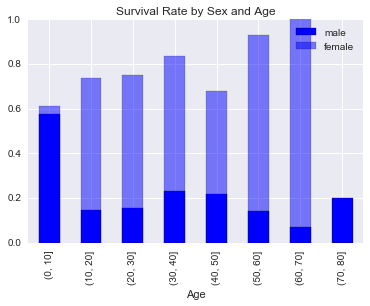

There is gender inequality across all age groups, except the age group of 0-10.


In [143]:
# Compare survival rate by sex and age. 

male_df = titanic_df.loc[titanic_df.Sex == 'male']
female_df = titanic_df.loc[titanic_df.Sex == 'female']

male_age_bin = pd.cut(male_df.Age, bins)
male_survival_rate_by_age = survival_rate_calculator(male_df, male_age_bin)
female_age_bin = pd.cut(female_df.Age, bins)
female_survival_rate_by_age = survival_rate_calculator(female_df, female_age_bin)

%matplotlib inline
male_survival_rate_by_age.plot.bar(label= 'male')
female_survival_rate_by_age.plot.bar(alpha=0.5, label='female')
plt.legend(loc='upper right')
plt.title('Survival Rate by Sex and Age')
plt.show()

print 'There is gender inequality across all age groups, except the age group of 0-10.'

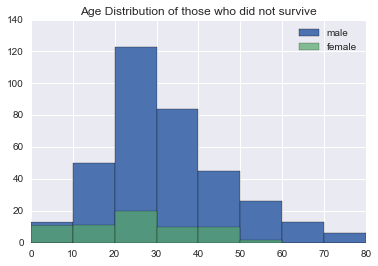

In [144]:
# Compare the age distribution of those who did not survive by sex

died_male_df = titanic_df.loc[(titanic_df['Sex']== 'male') & (titanic_df['Survived'] == 0)]
died_female_df = titanic_df.loc[(titanic_df['Sex']== 'female') & (titanic_df['Survived'] == 0)]

%matplotlib inline

bins = np.linspace(0, 80, num=9)
plt.hist(died_male_df['Age'], bins, label='male')
plt.hist(died_female_df['Age'], bins, label='female', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Age Distribution of those who did not survive')
plt.show()

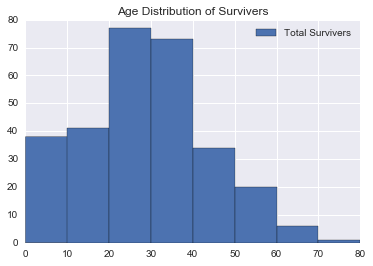

In [145]:
survived_df = titanic_df.loc[titanic_df['Survived'] == 1]

%matplotlib inline
plt.hist(survived_df['Age'], bins, label='Total Survivers')
plt.legend(loc='upper right')
plt.title('Age Distribution of Survivers')
plt.show()